#### Classification with Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
#we will now simply drop the nan for ease
df = df.dropna()

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True,dtype=np.number)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [7]:
y = df['species']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [12]:
rfc.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=101)

In [13]:
preds = rfc.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

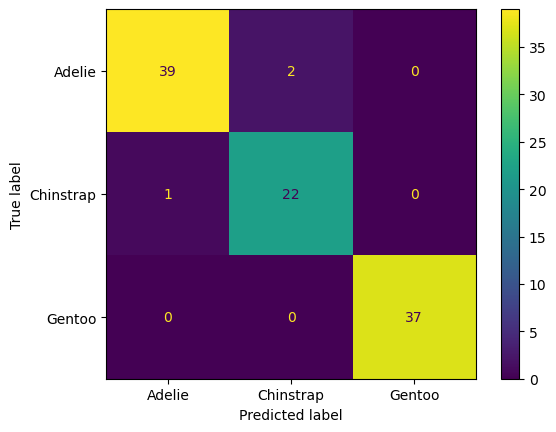

In [15]:
ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)

In [16]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [17]:
rfc.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

##### Variation of Hyperparameters

In [18]:
df = pd.read_csv('data_banknote_authentication.csv')

In [19]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [20]:
df.isnull().sum()

Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

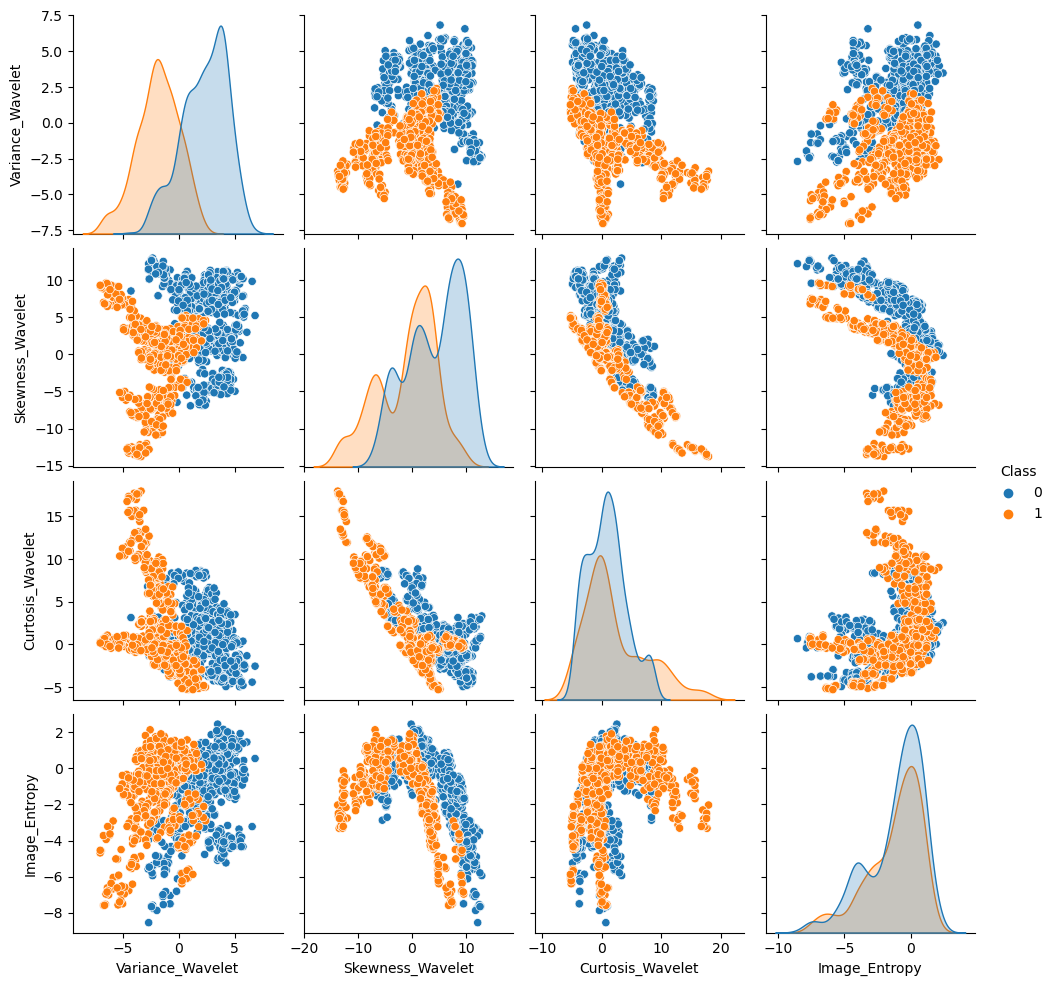

In [21]:
sns.pairplot(data=df,hue='Class')

In [22]:
X = df.drop('Class',axis=1)

In [23]:
y = df['Class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
n_estimators = [64,100,128,200]

In [29]:
max_features = [2,3,4]   #we can also pass 'sqrt','log2','auto',etc 

In [28]:
bootstrap = [True,False]

In [30]:
oob_score = [True,False]

In [31]:
param_grid = {'n_estimators':n_estimators,'max_features':max_features,
             'bootstrap':bootstrap,'oob_score':oob_score}

In [32]:
rfc = RandomForestClassifier()

In [33]:
grid = GridSearchCV(rfc,param_grid)

In [34]:
grid.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\P

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [35]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [36]:
#oob_score is just the extra information, it does not affect the performance/accuracy of Random Forest

In [48]:
rfc = RandomForestClassifier(bootstrap= True, max_features= 2, n_estimators=64, oob_score= True)

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [50]:
rfc.oob_score_

0.9948542024013722

In [51]:
predictions = rfc.predict(X_test)

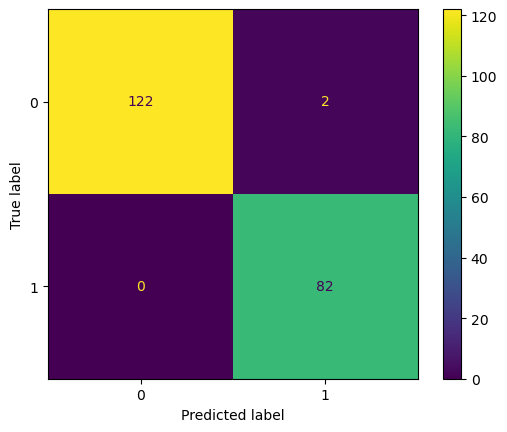

In [52]:
ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [54]:
#do we really need so many estimators lets check it out by plotting the estimator vs error 
from sklearn.metrics import accuracy_score
errors = []
misclassifications = []

for n in range(1,200):

    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1- accuracy_score(y_test,preds)
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

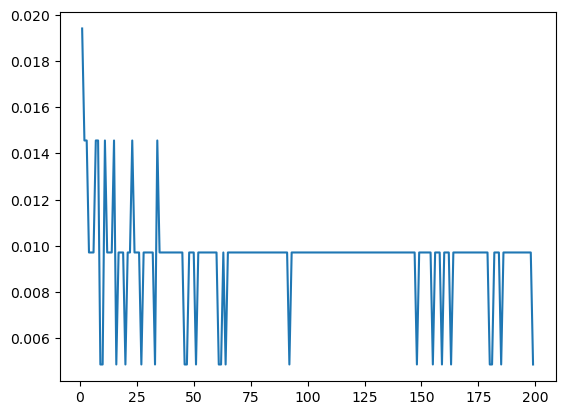

In [55]:
plt.plot(range(1,200),errors)

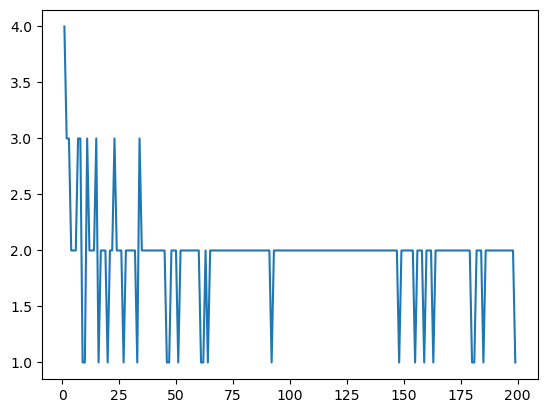

In [56]:
plt.plot(range(1,200),misclassifications)

#### Random Forest For Regression

In [58]:
df = pd.read_csv('rock_density_xray.csv')

In [59]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [60]:
df.columns = ['Signal','Density']

In [61]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

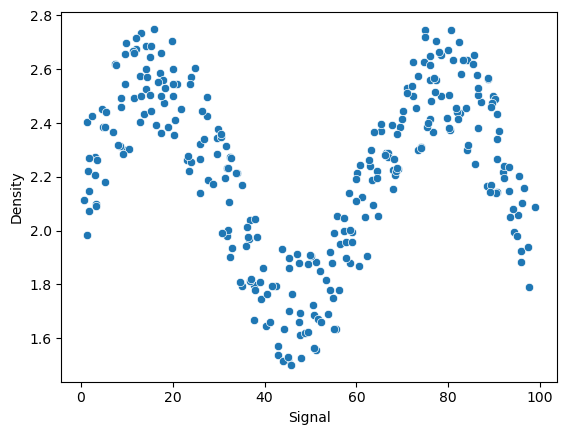

In [62]:
sns.scatterplot(data=df,x='Signal',y='Density')

In [69]:
#no need of scaling because simple data
X = df['Signal'].values.reshape(-1,1) #we have to do this for single feature
y = df['Density']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr_model = LinearRegression()

In [73]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [74]:
lr_preds = lr_model.predict(X_test)

In [75]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [77]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [78]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [81]:
#since the values are good we might think that model is performing good on average but their is a catch 
#lets see this by plotting it out

In [83]:
signal_range = np.arange(0,100)

In [86]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

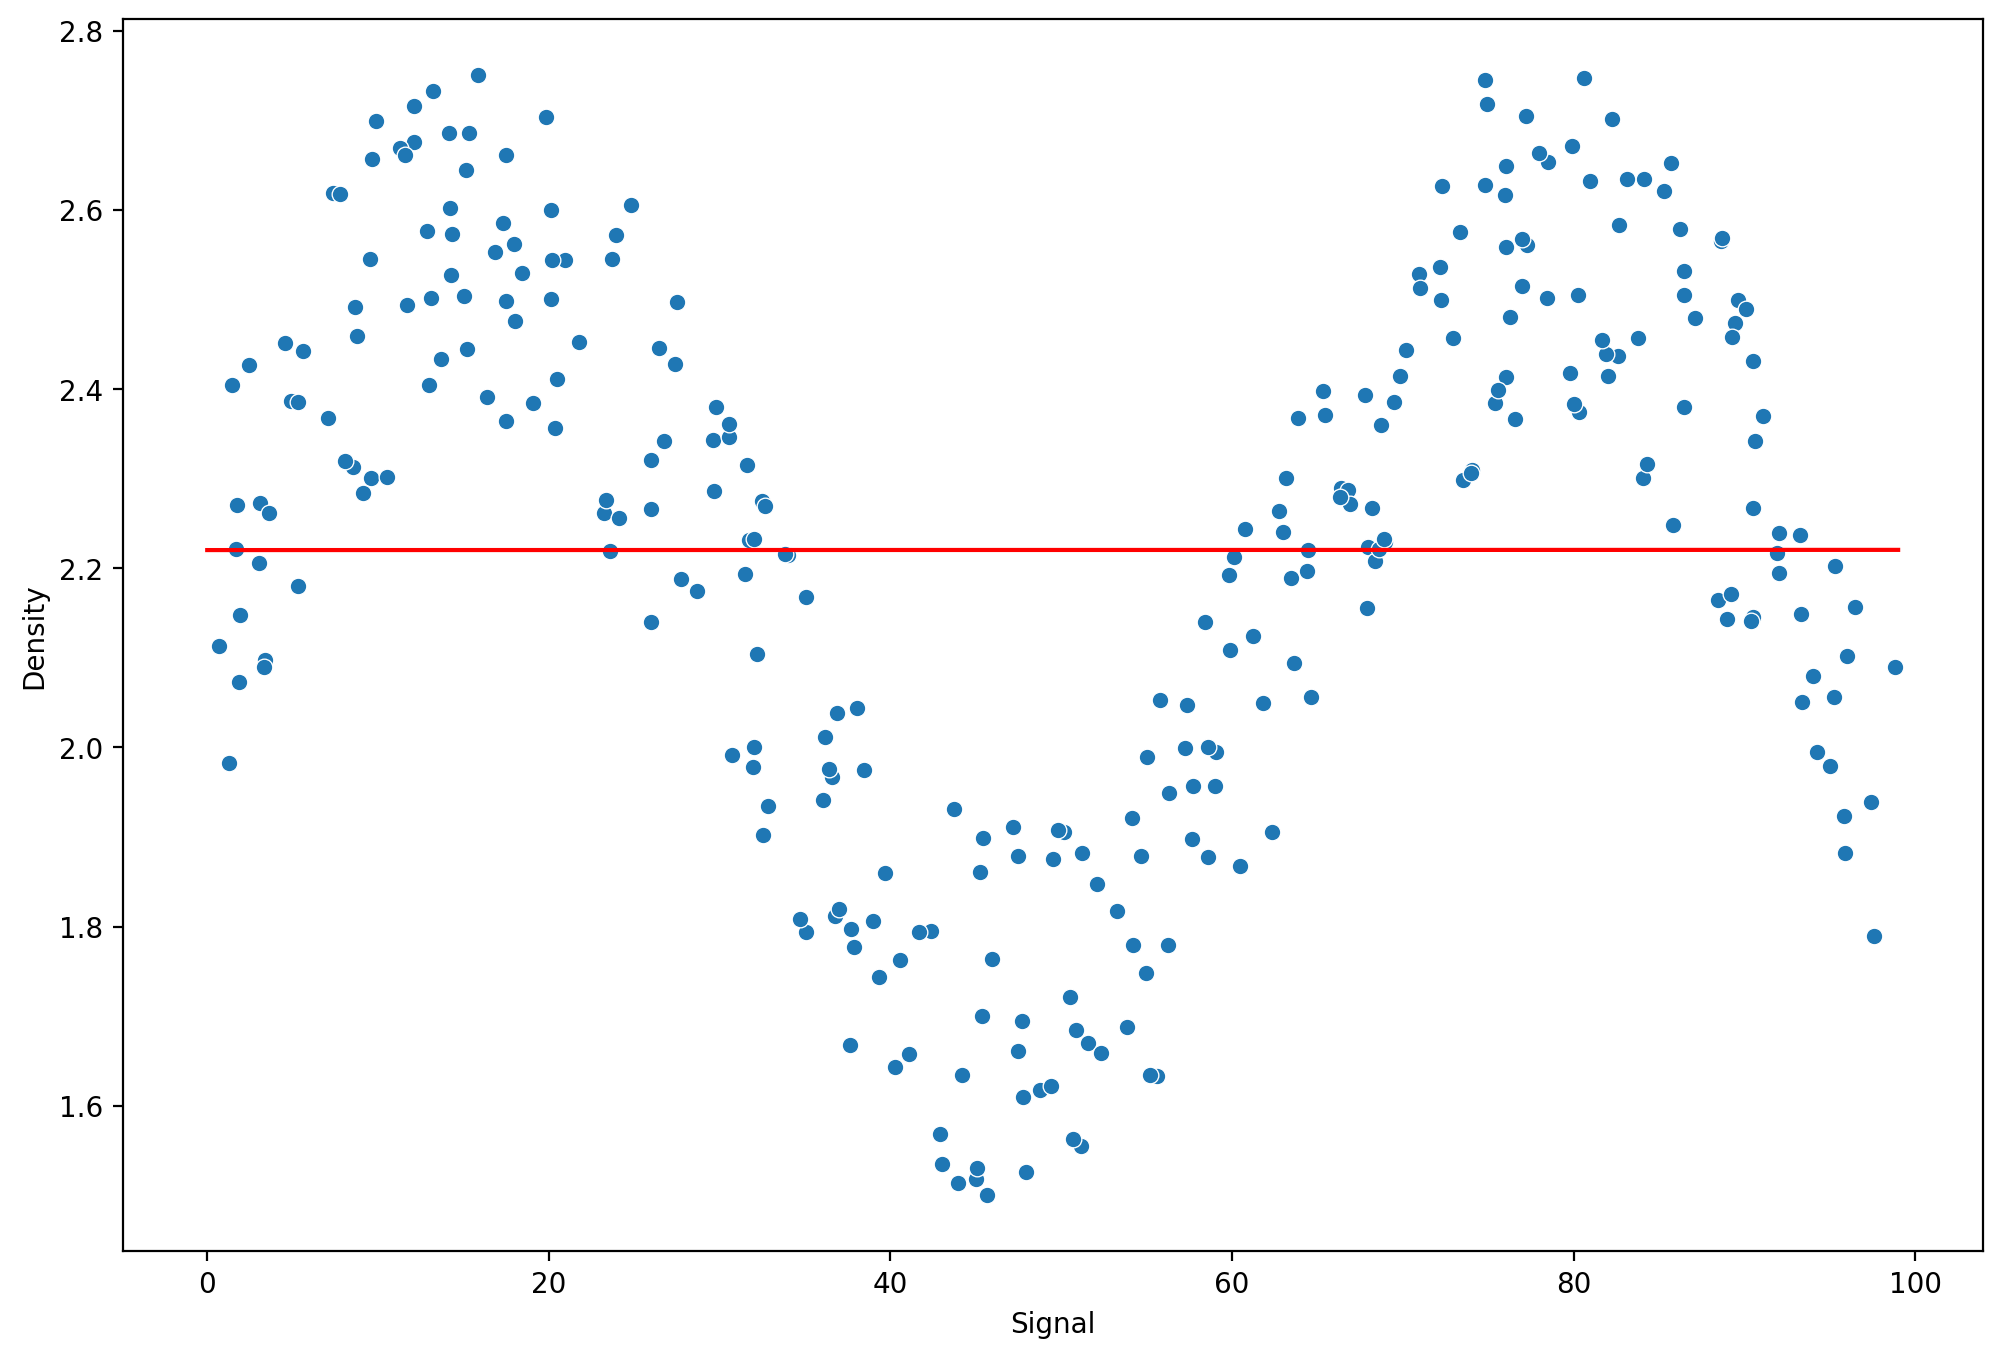

In [88]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df,x='Signal',y='Density')
plt.plot(signal_range,signal_preds,'red')
#that's the error lr_model is just giving us the average 

In [90]:
#helper Functions
def run_model(model,X_train,y_train,X_test,y_test):

    model.fit(X_train,y_train)
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(data=df,x='Signal',y='Density')
    plt.plot(signal_range,signal_preds,'red')

In [91]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [98]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE: 0.11969195997112125
RMSE: 0.13807556281180497


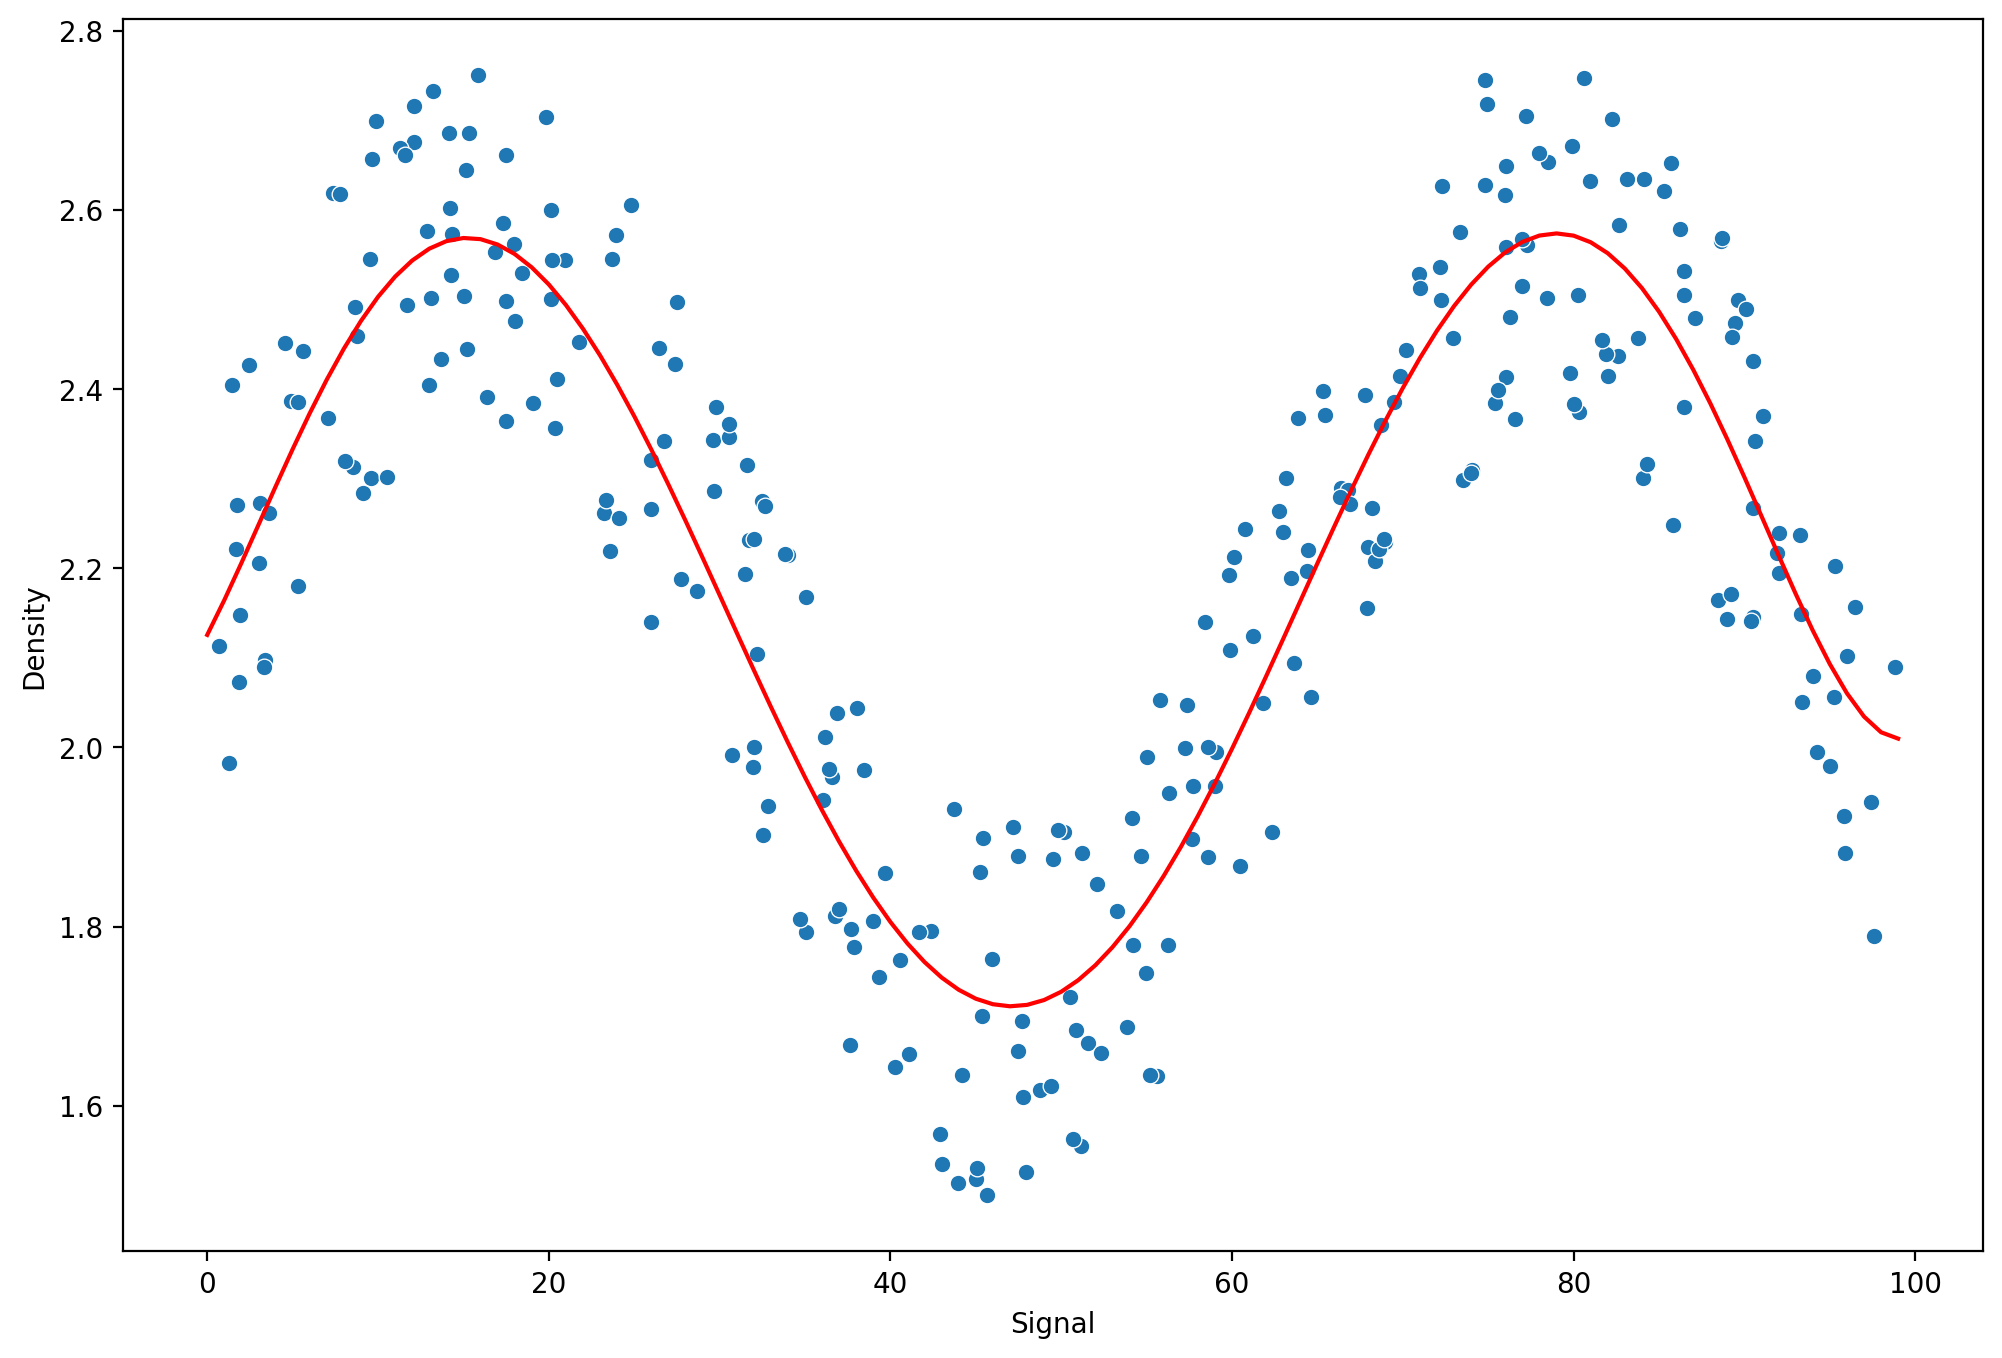

In [99]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [100]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


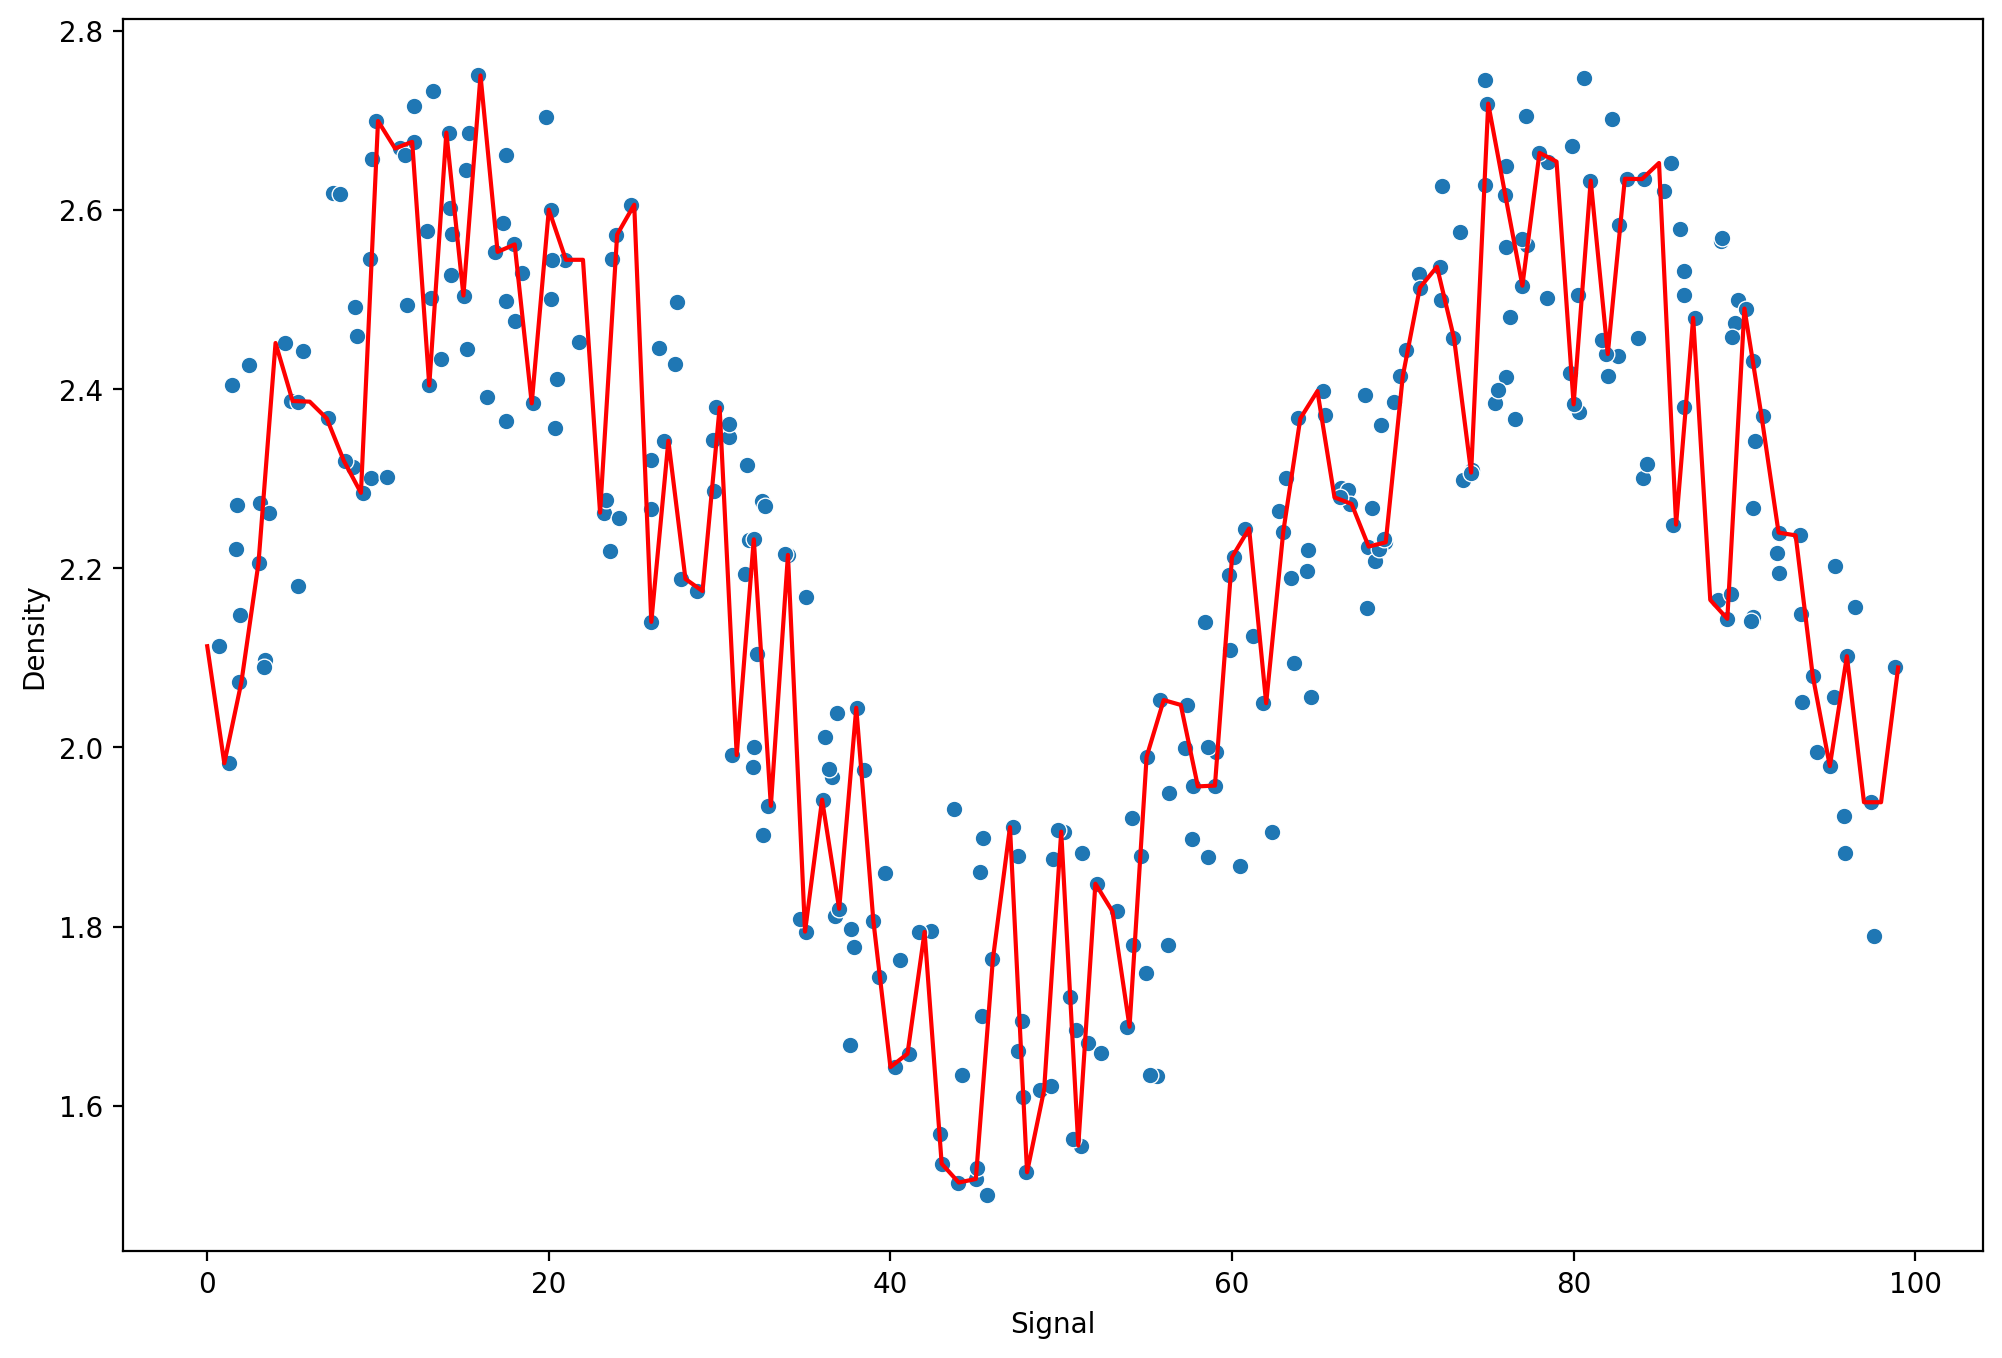

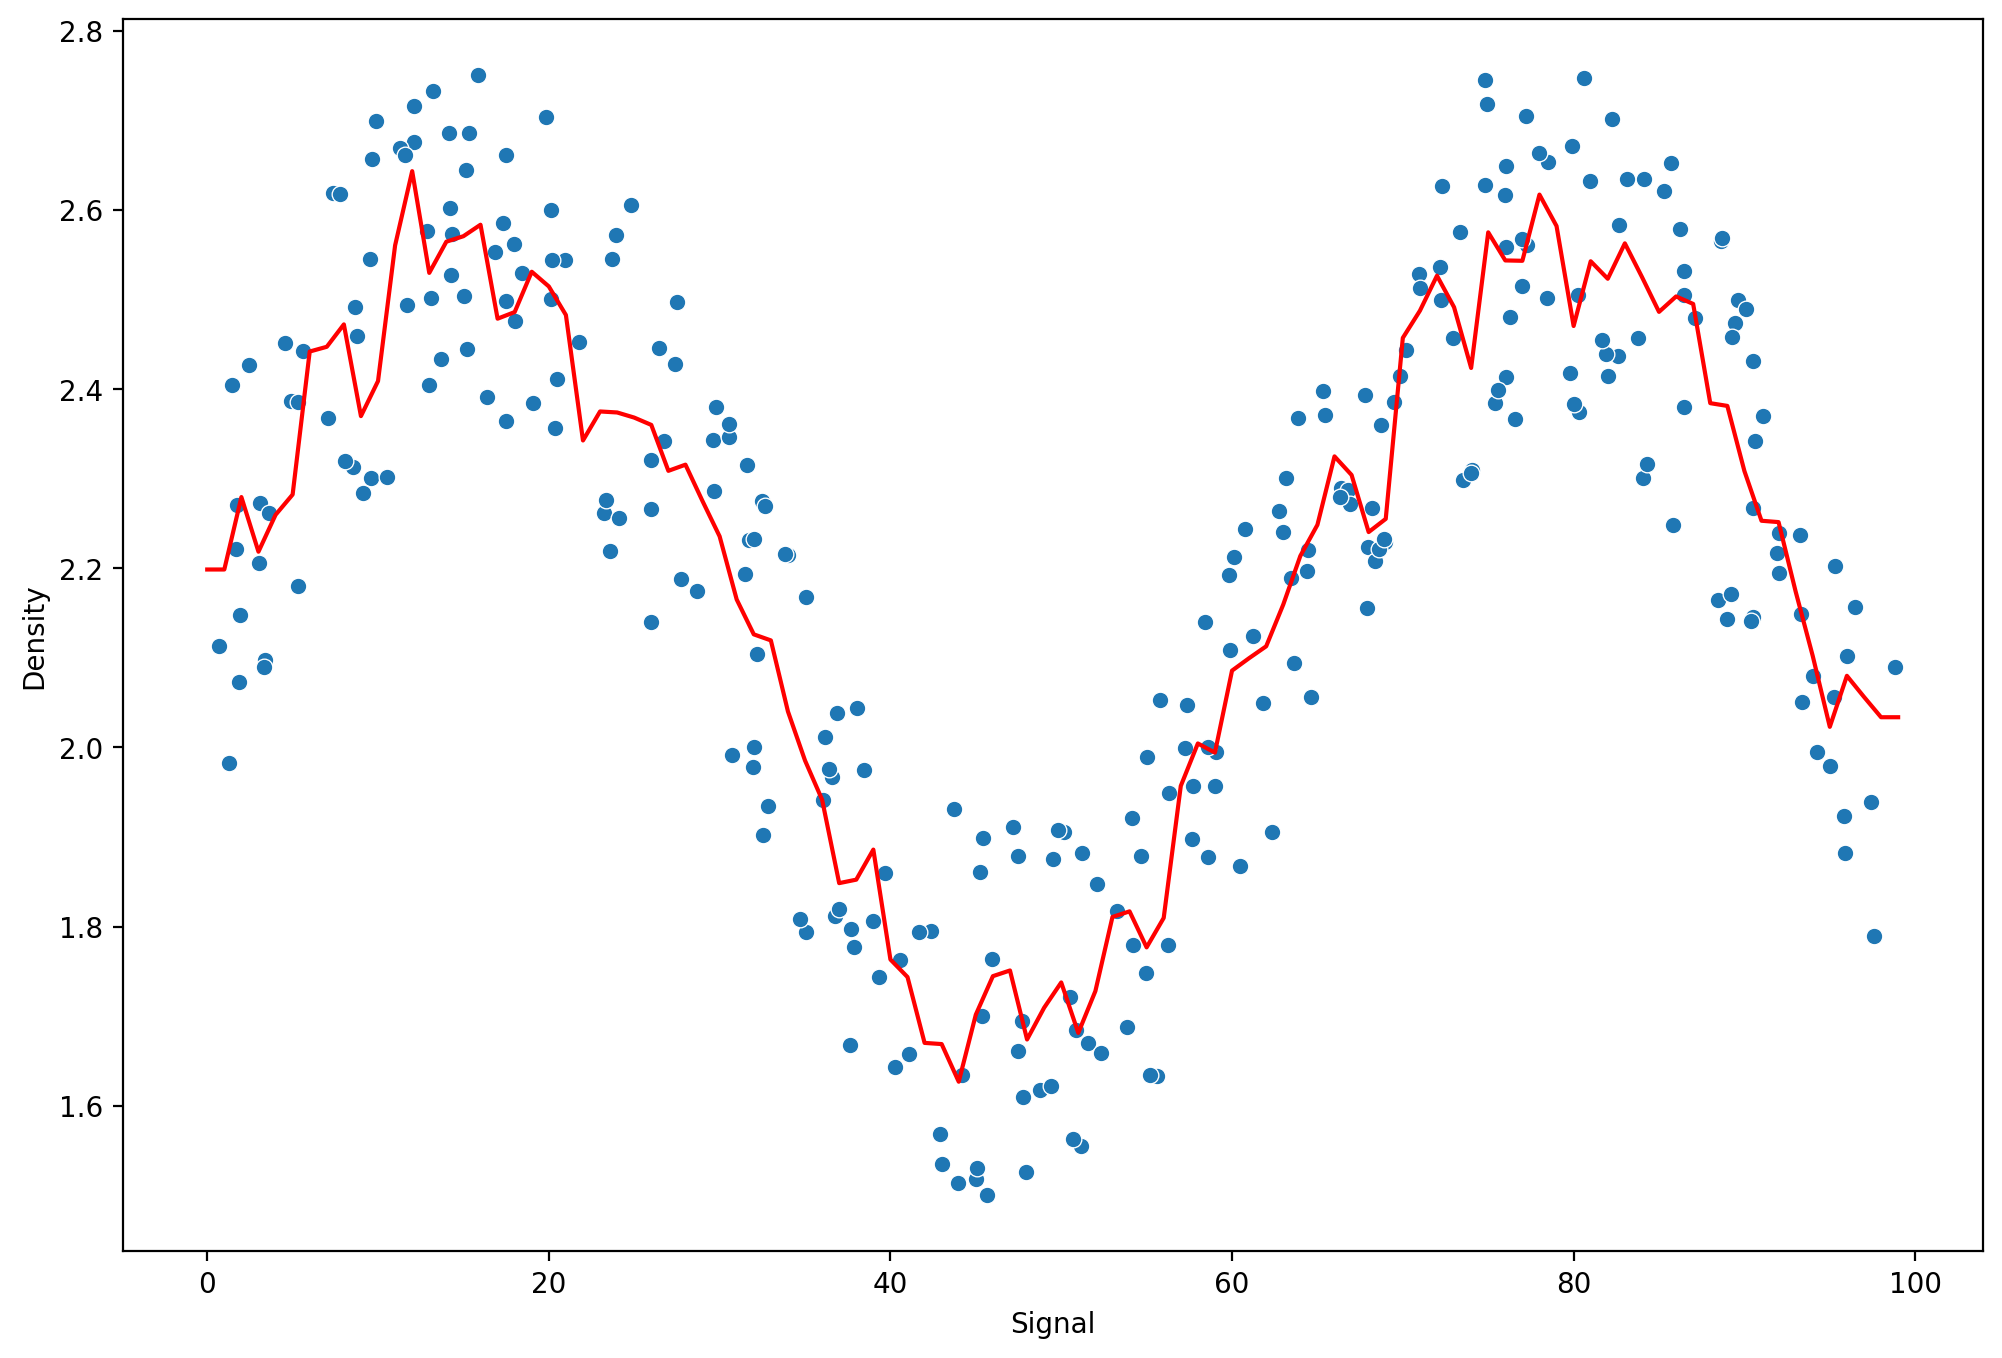

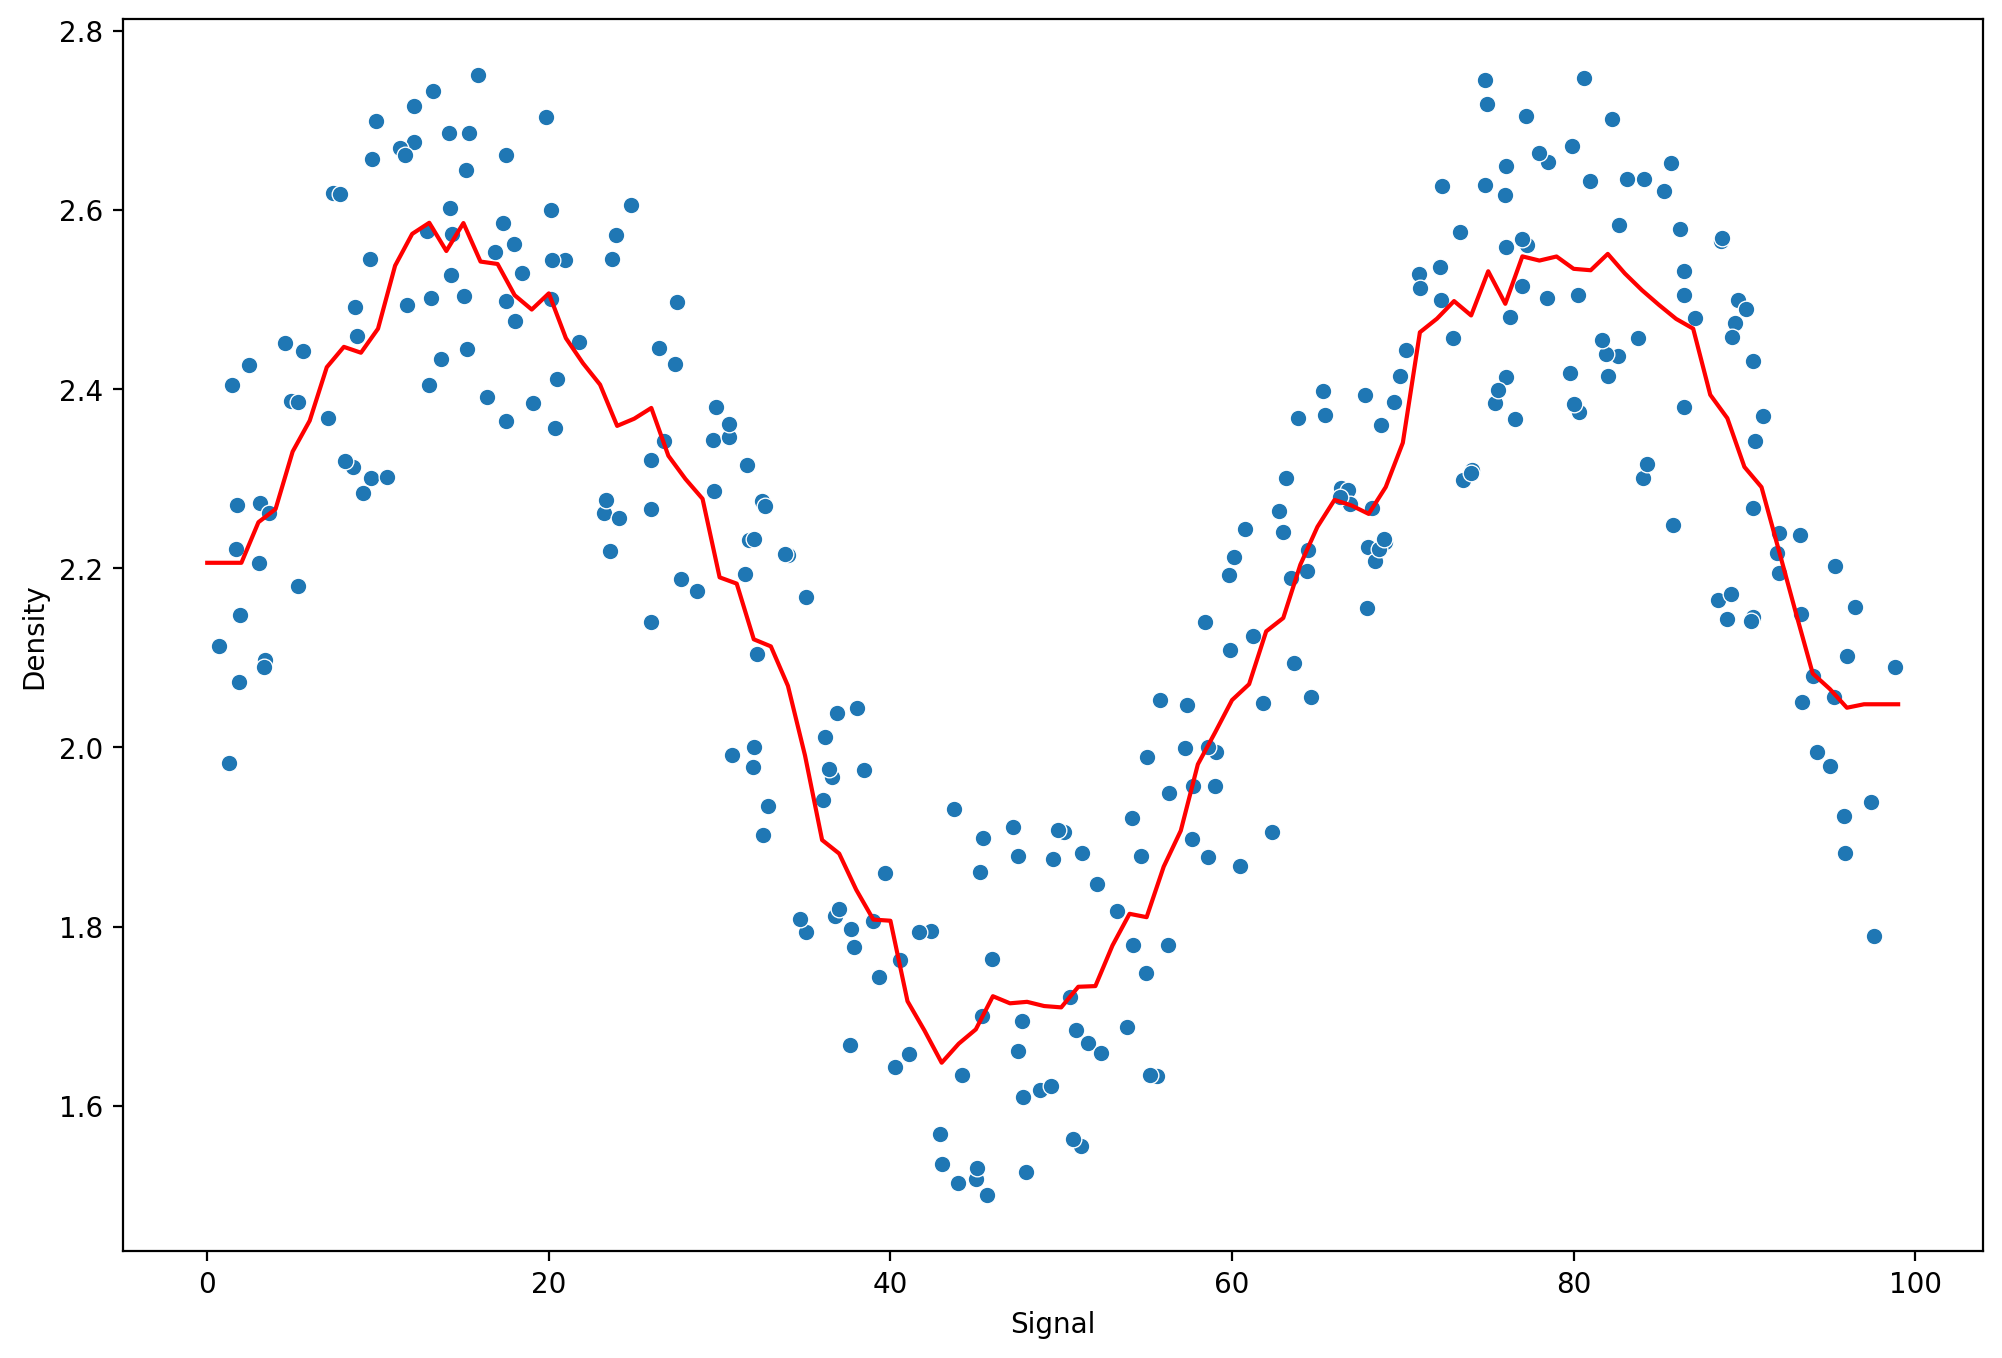

In [101]:
k_values = [1,5,10]

for n in k_values:

    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [102]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


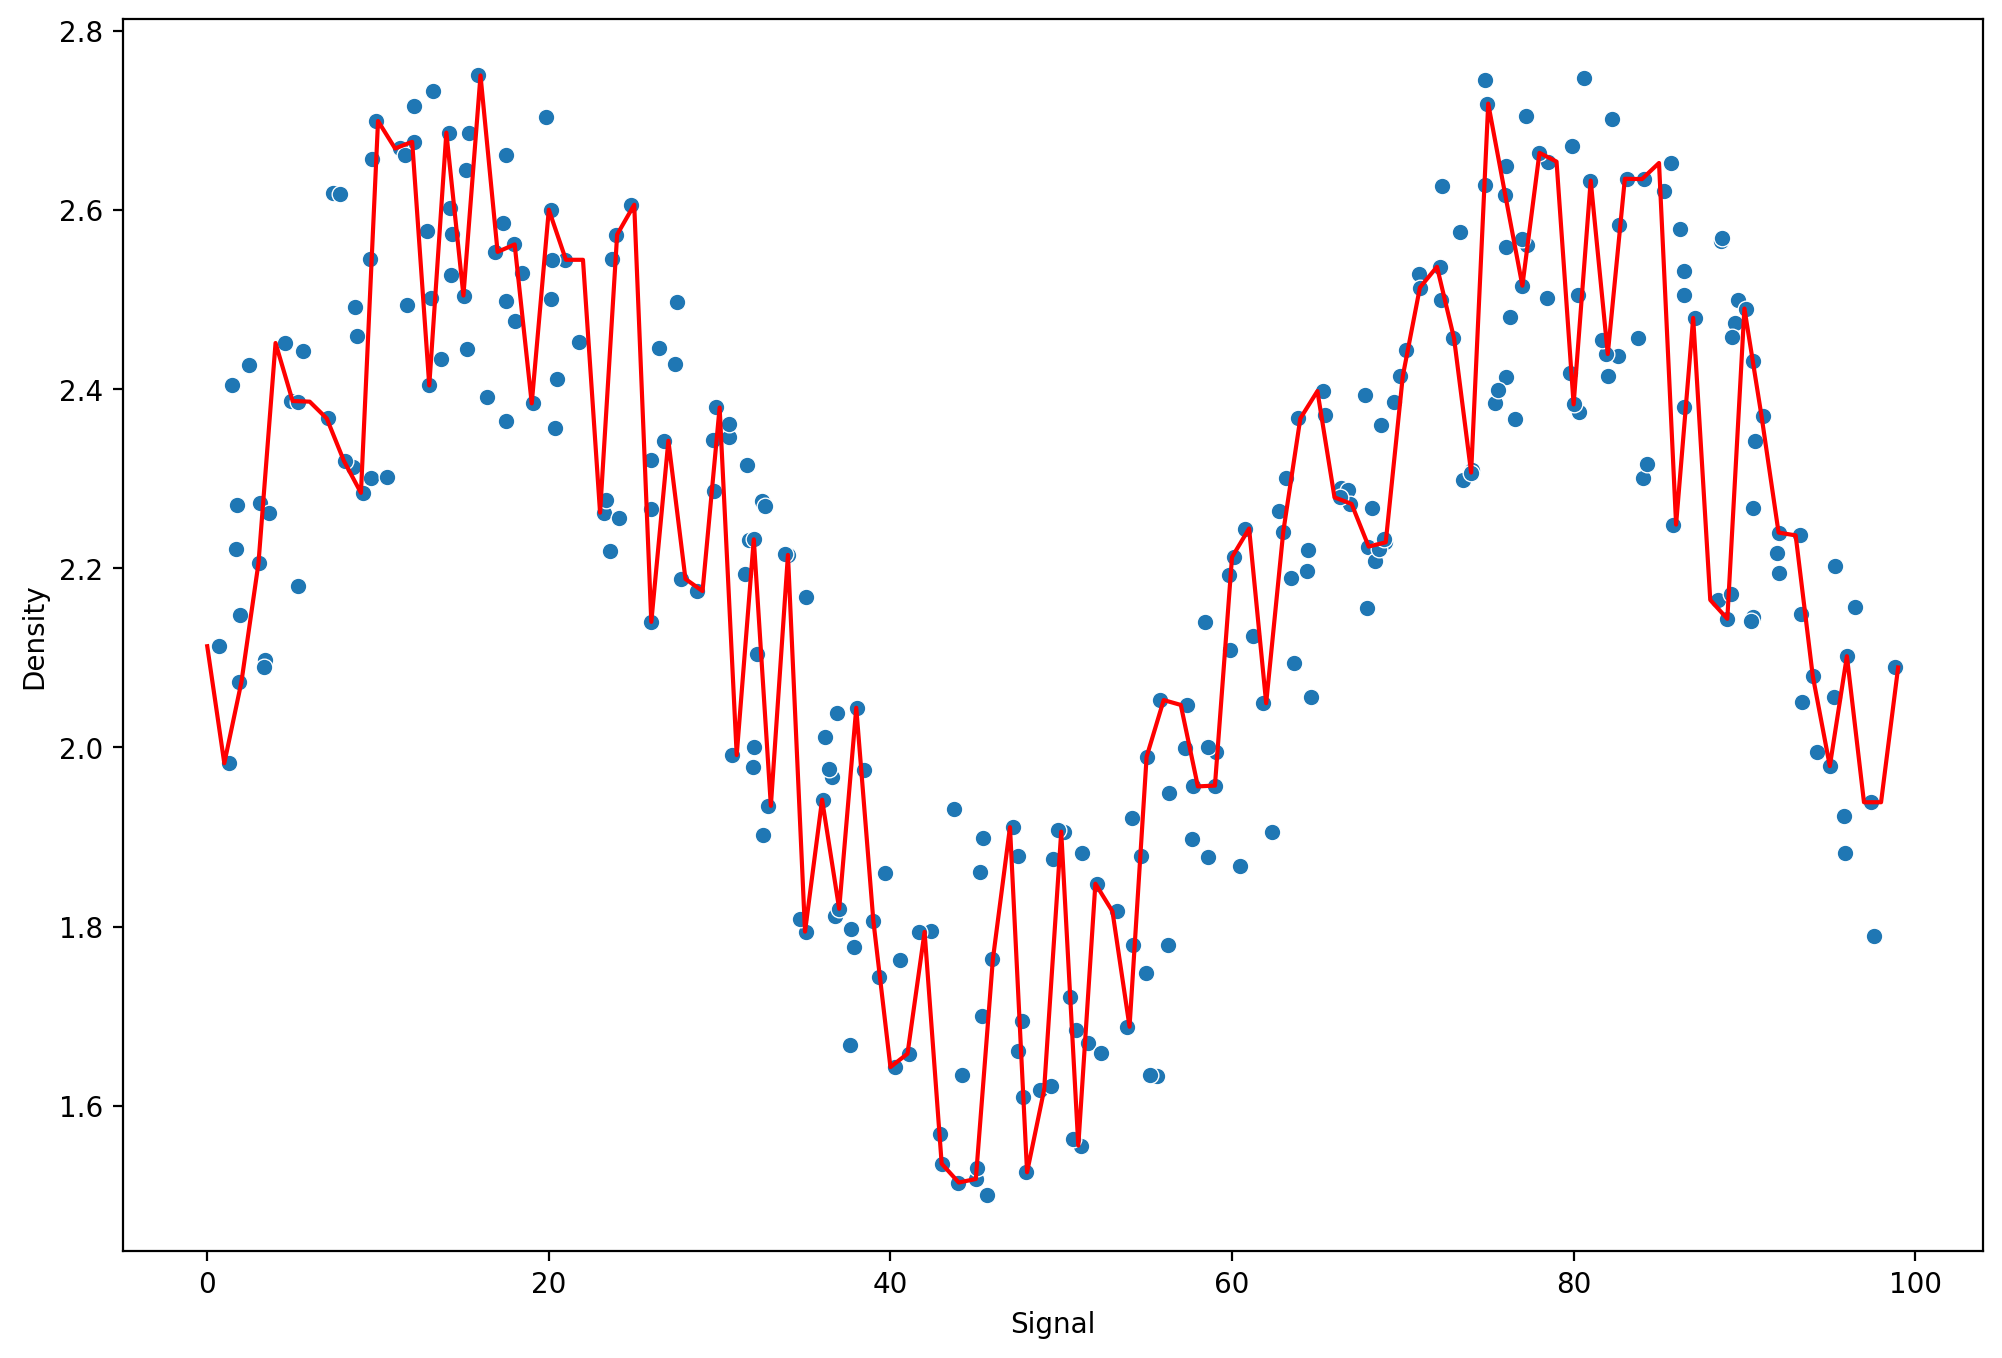

In [103]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [104]:
from sklearn.svm import SVR

In [105]:
from sklearn.model_selection import GridSearchCV

In [108]:
param = {'C':[0.01,0.1,1,5,10,100,1000],
        'gamma':['auto','scale']}
svr=SVR()
grid = GridSearchCV(svr,param)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


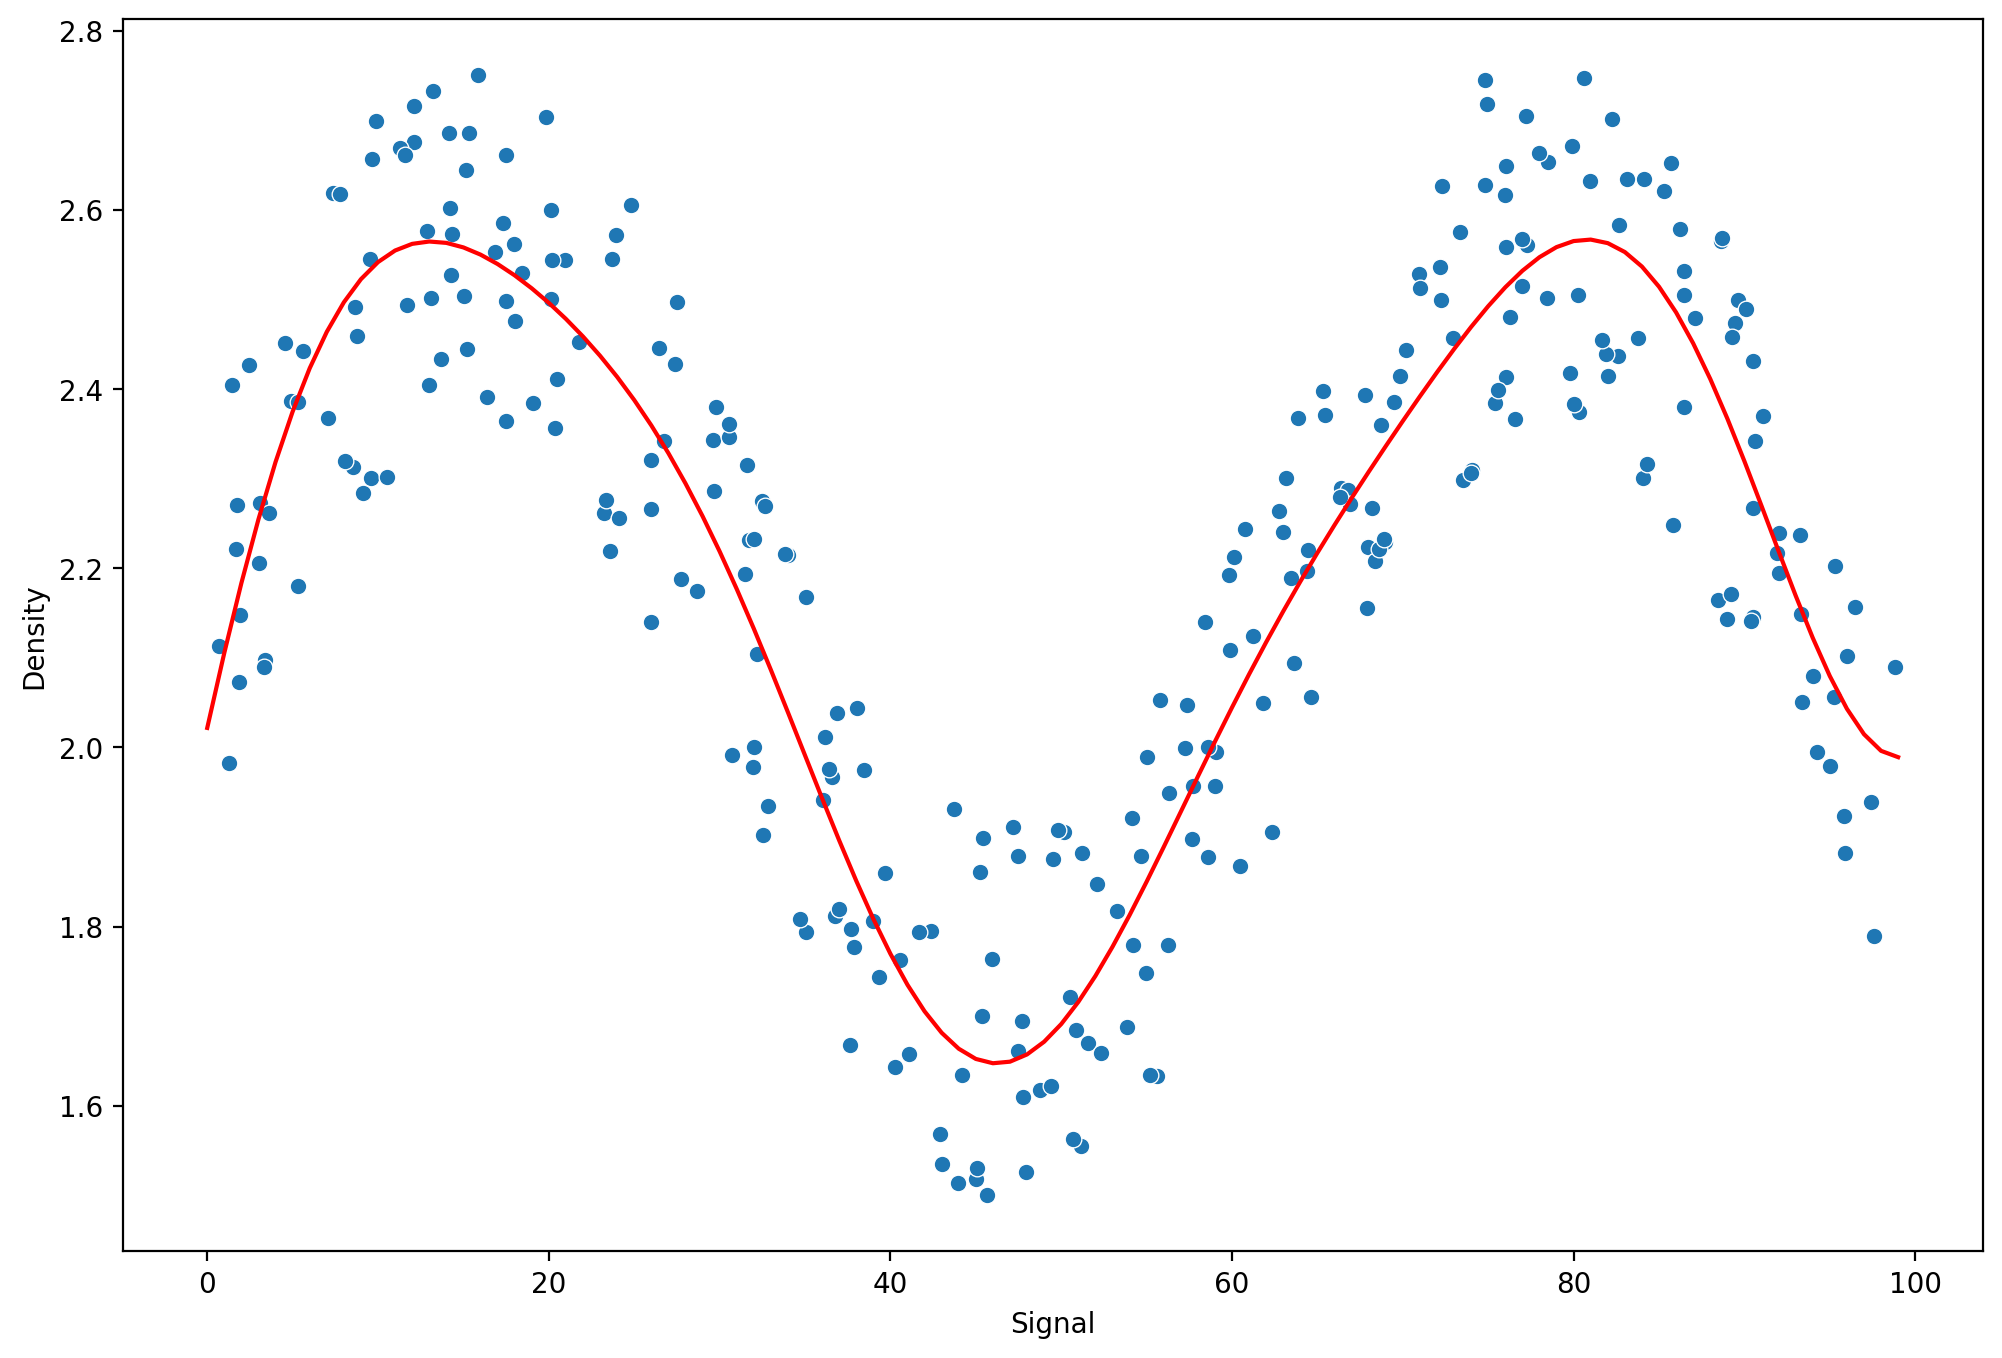

In [109]:
run_model(grid,X_train,y_train,X_test,y_test)

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.10801286763344815
RMSE: 0.12845319557038273


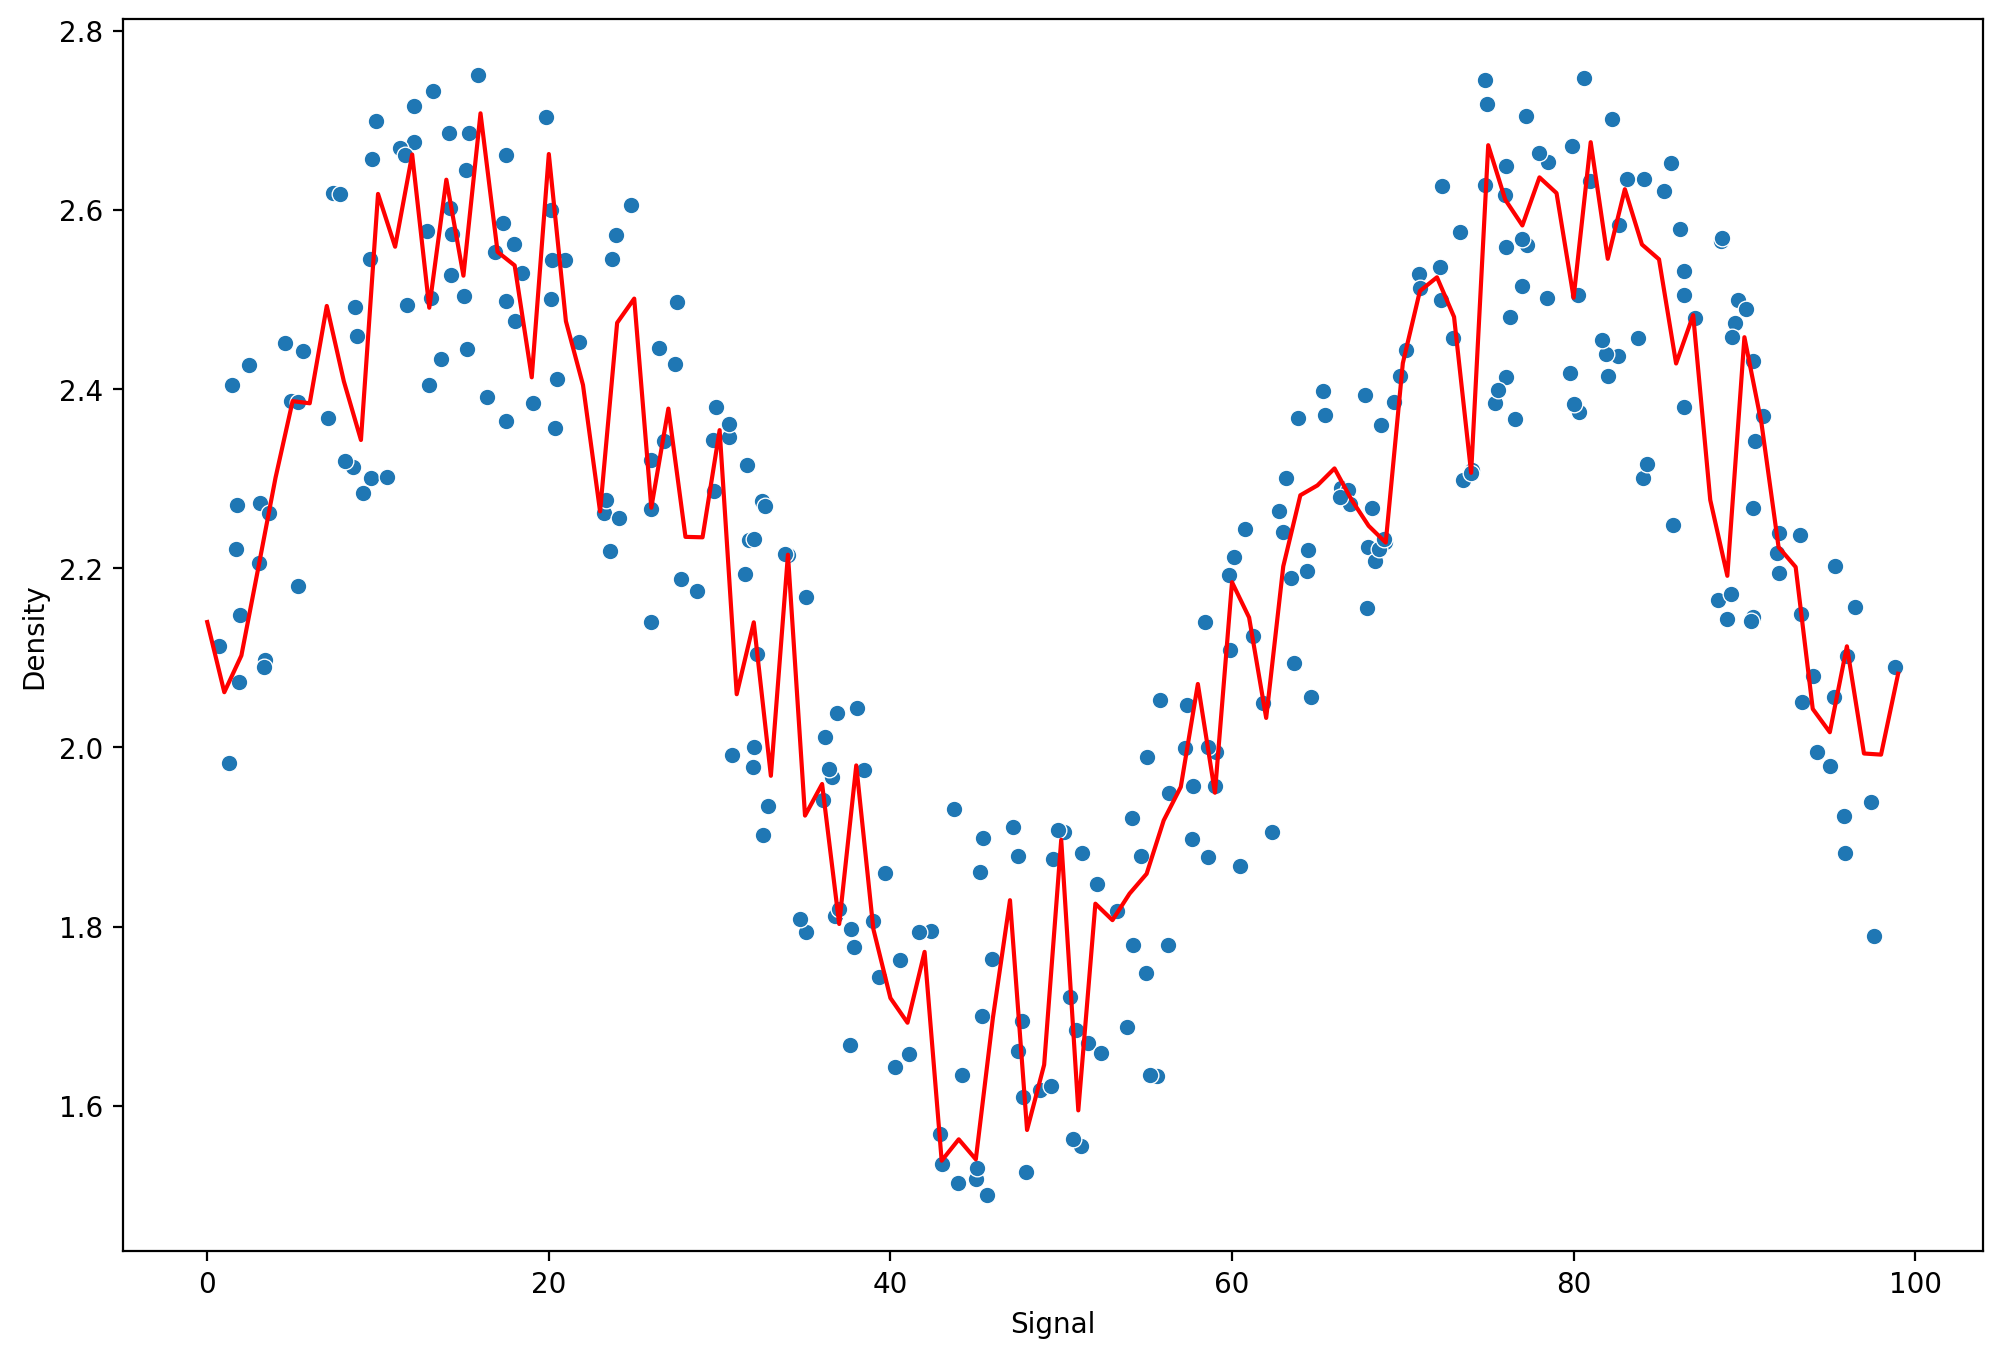

In [112]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [113]:
#we will cover this later
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


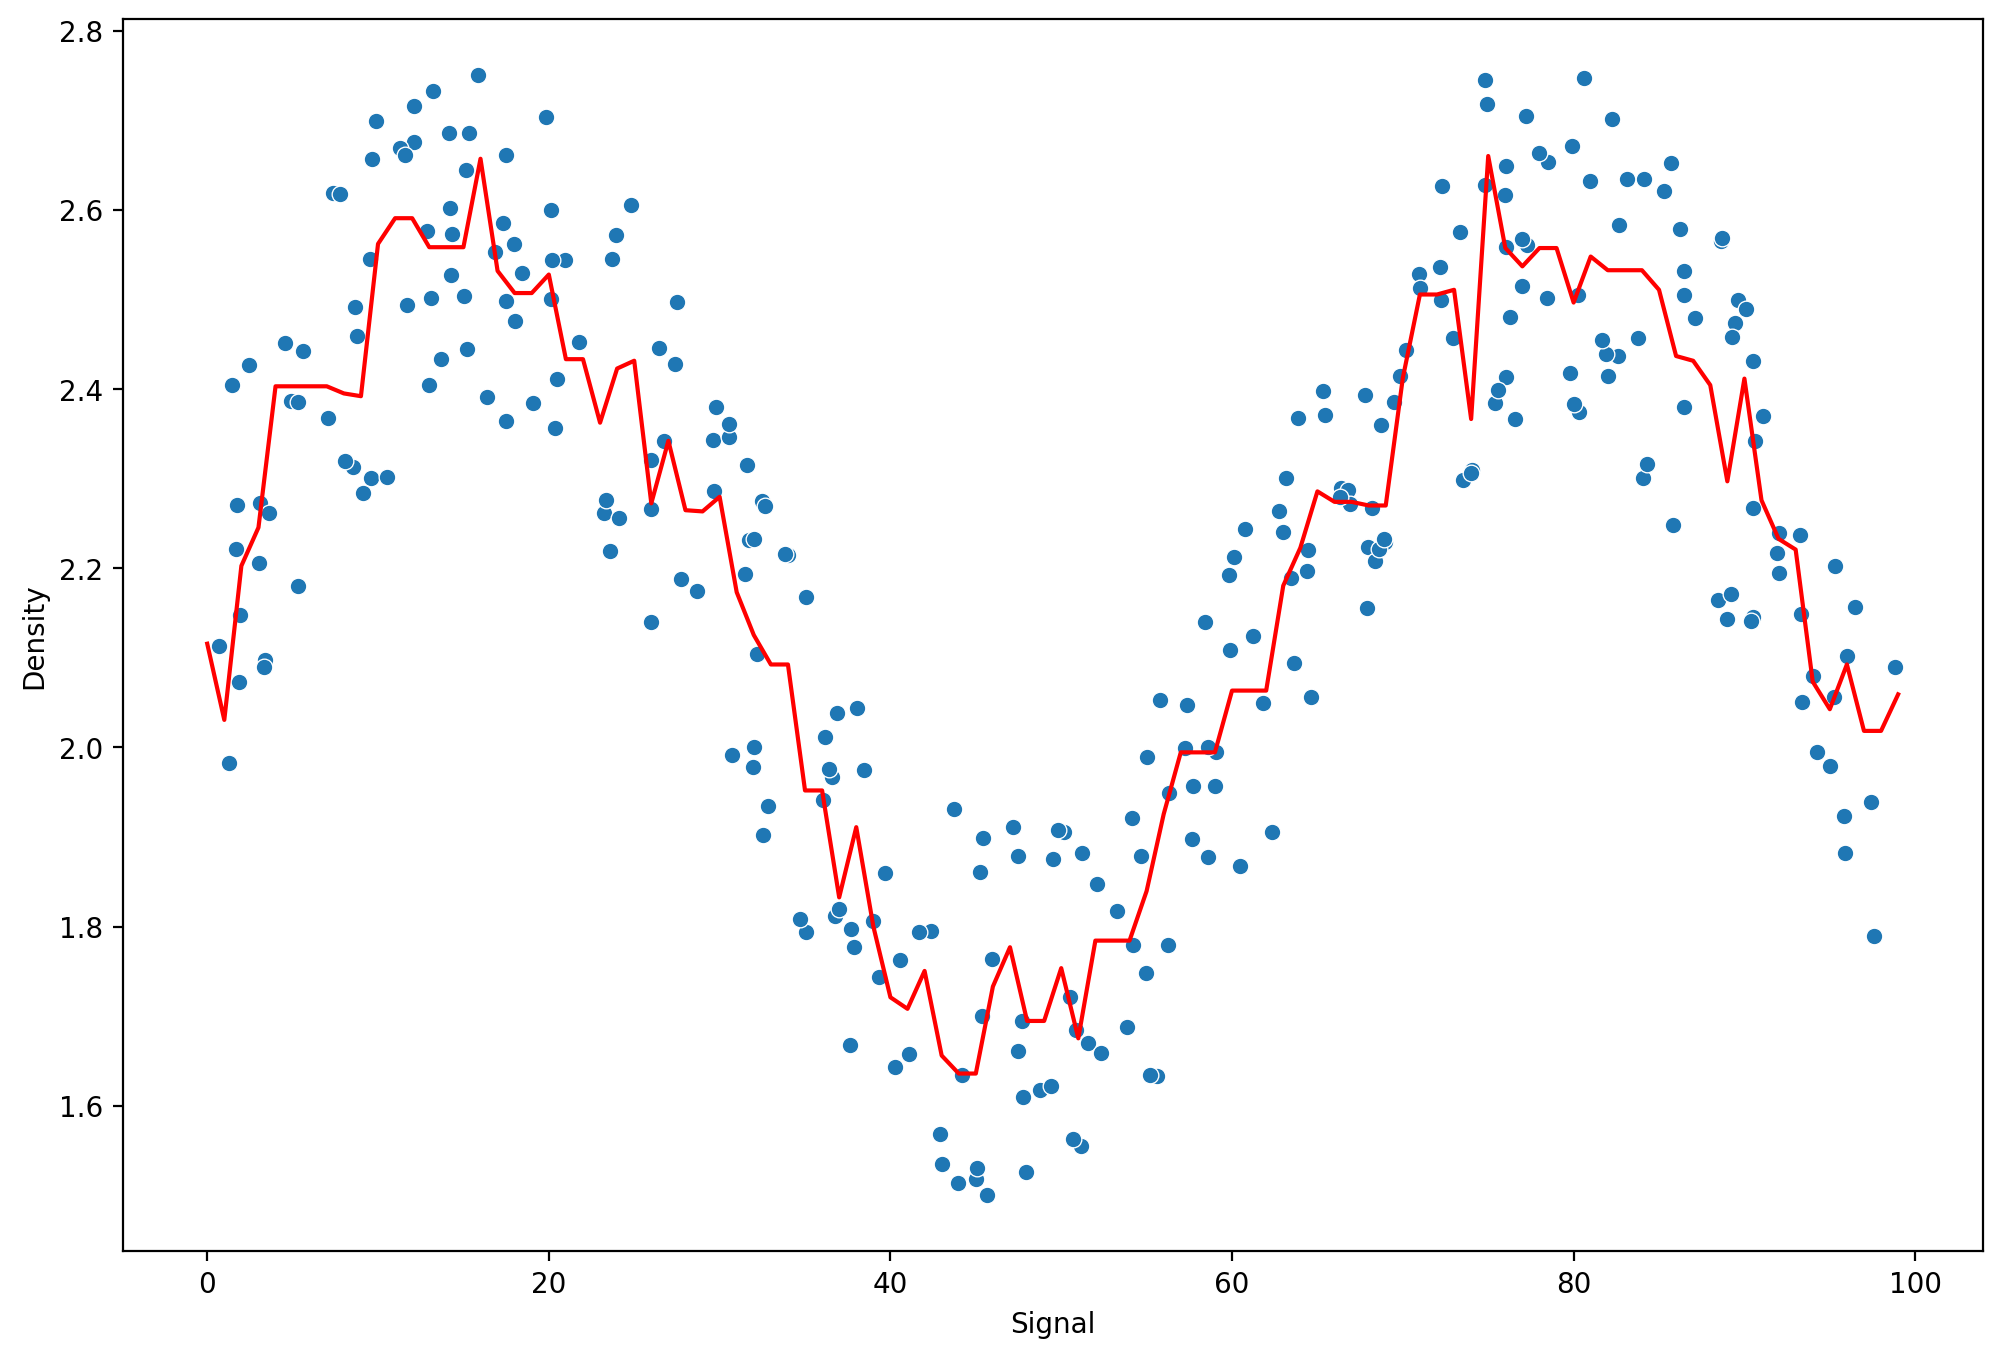

In [114]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE: 0.11951099777161253
RMSE: 0.13837411923936657


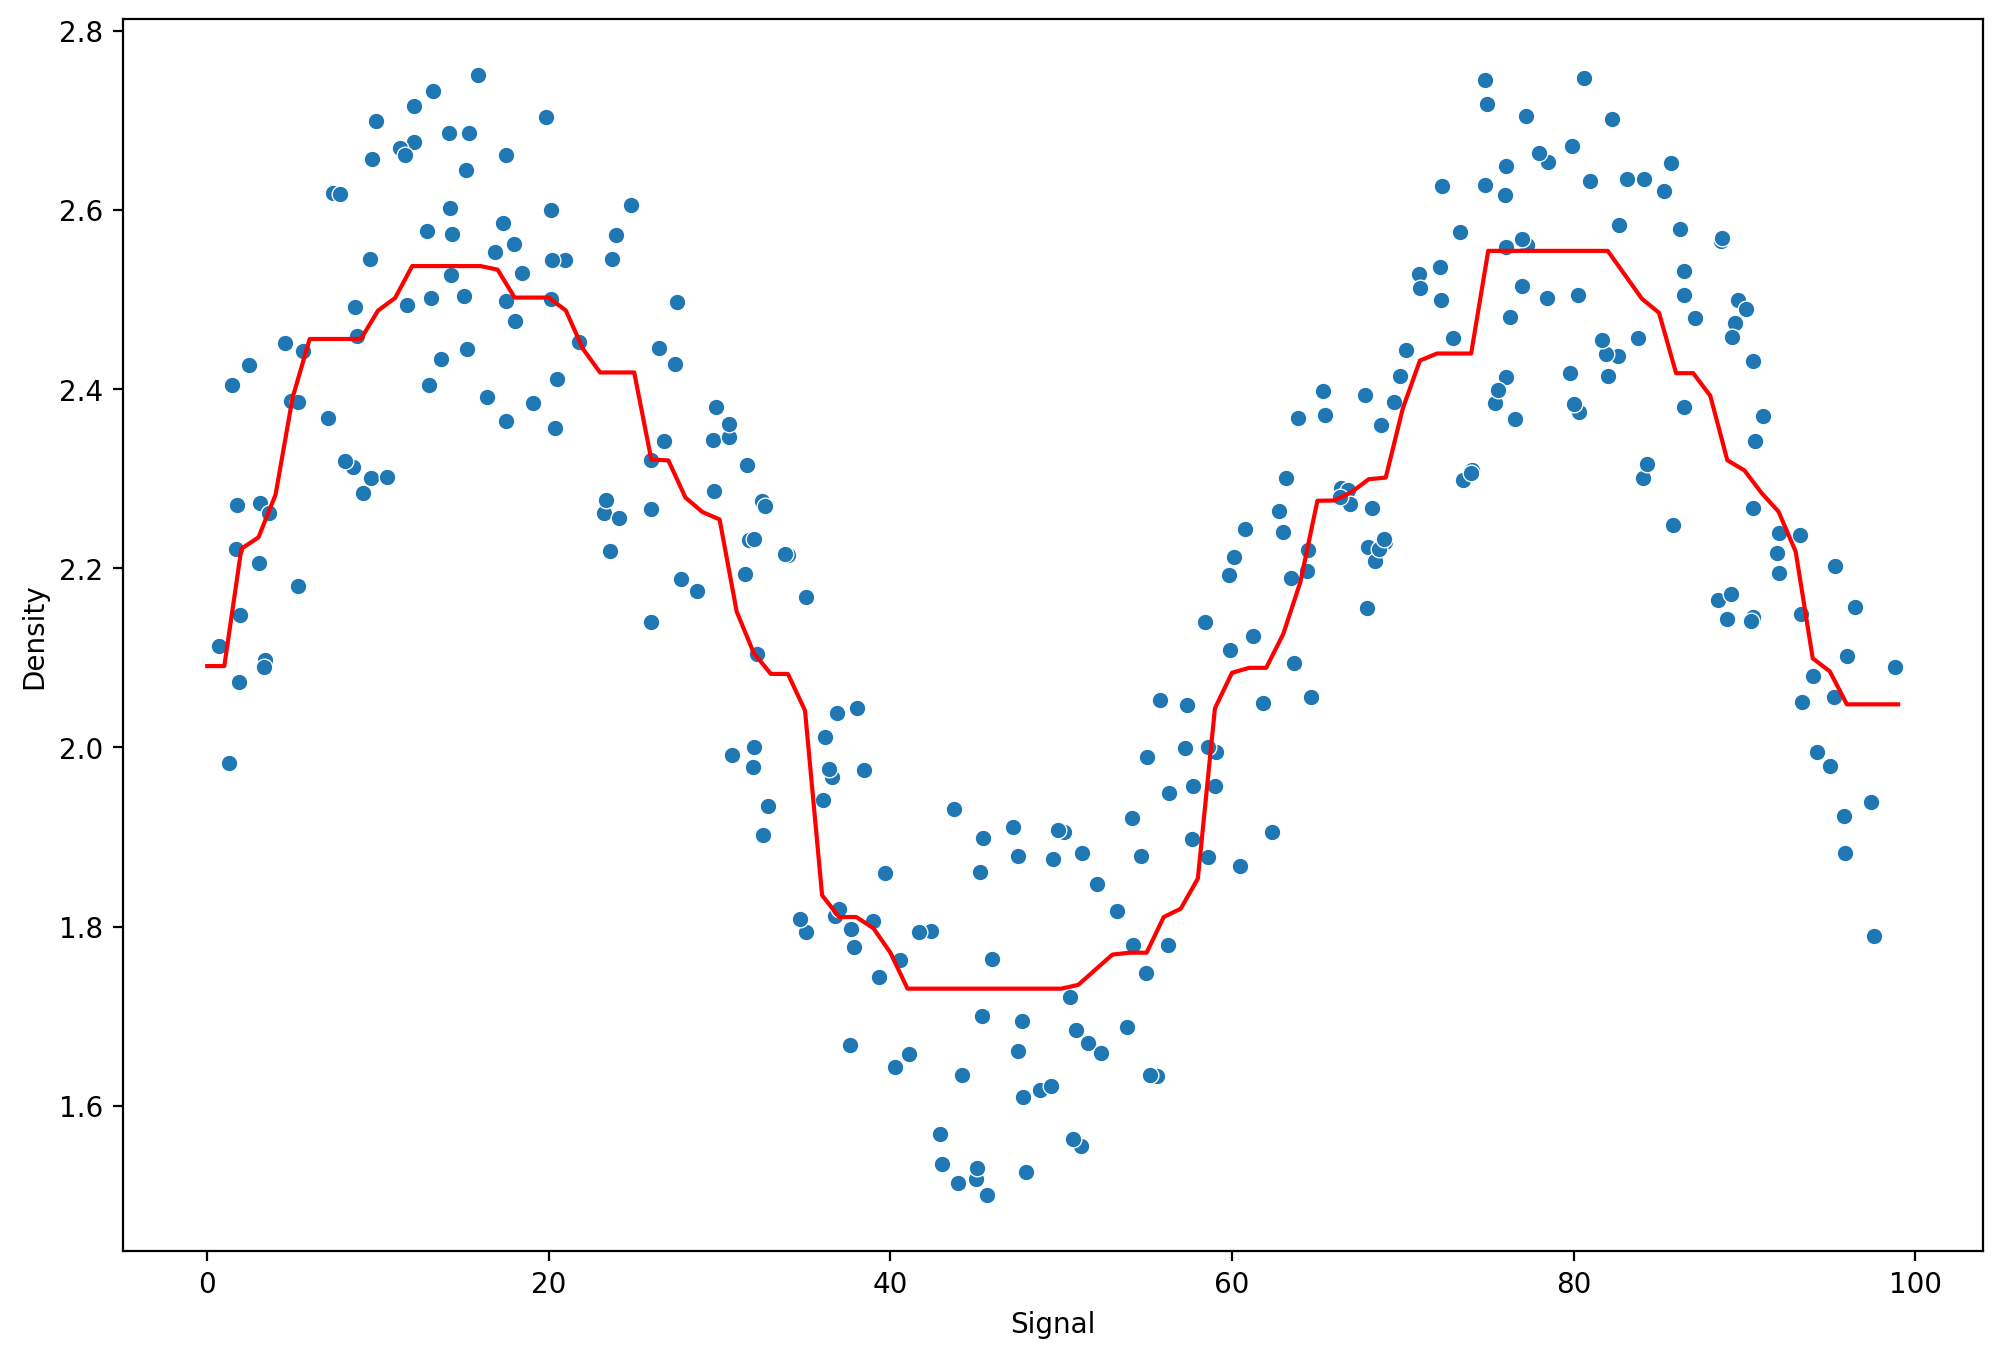

In [115]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)